In [1]:
from functions import *
import numpy as np

/home/buckcenter.org/hhuang/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


## ALL

In [2]:
RS_composite_all = RiskScore.load('RS_cvd_all.tar.gz')

Successfully loaded file: ./RS_cvd_all.pkl
Successfully uploaded DeepSurv model from folder: ./RS_cvd_all_DeepSurv_model


In [3]:
##RS_composite_all.X_train.assign(T=RS_composite_all.T_train, E=RS_composite_all.E_train)

In [4]:
#evaluation_prms = {}
#evaluation_prms.setdefault('n_bootstrap', 10)
#RS_composite_all.deep_surv.evaluate(RS_composite_all.X_train,
#                                    RS_composite_all.E_train,
#                                    RS_composite_all.T_train,
#                                    RS_composite_all.X_test,
#                                    RS_composite_all.E_test,
#                                    RS_composite_all.T_test,
#                                    evaluation_prms)
#                                    

In [5]:
#print(RS_composite_all.X_train.shape)
#print(RS_composite_all.E_train.shape)
#print(RS_composite_all.T_train.shape)

In [6]:
#RS_composite_all.X_train.assign(T=RS_composite_all.T_train, E=RS_composite_all.E_train)

## jacobian

In [7]:
def get_Jacobian(RS_composite_all,eps=1e-3):
    n,p = RS_composite_all.X_train.shape
    J = np.zeros([n,p])
    for i in range(p):
        #print(i)
        x0 = RS_composite_all.X_train.copy()
        x1 = RS_composite_all.X_train.copy()
        x0.iloc[:,i] = x0.iloc[:,i] - eps
        x1.iloc[:,i] = x1.iloc[:,i] + eps
        J[:,i:i+1] = ((RS_composite_all.deep_surv.predict_risk(x1) \
                      - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps))[:,0:0+1]
    return J

J = get_Jacobian(RS_composite_all)

#n,p = RS_composite_all.X_train.shape
#J = np.zeros([n,p])
#x0.iloc[:,1] - 0.001 
##for i in range(p):
##    print(i)
##    x0 = RS_composite_all.X_train.copy()
##    x1 = RS_composite_all.X_train.copy()
##    x0[:,i] = x0[:,i] - eps
##    x1[:,i] = x1[:,i] + eps
##    J[:,i:i+1] = (RS_composite_all.deep_surv.predict_risk(x1) \
##                  - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps)

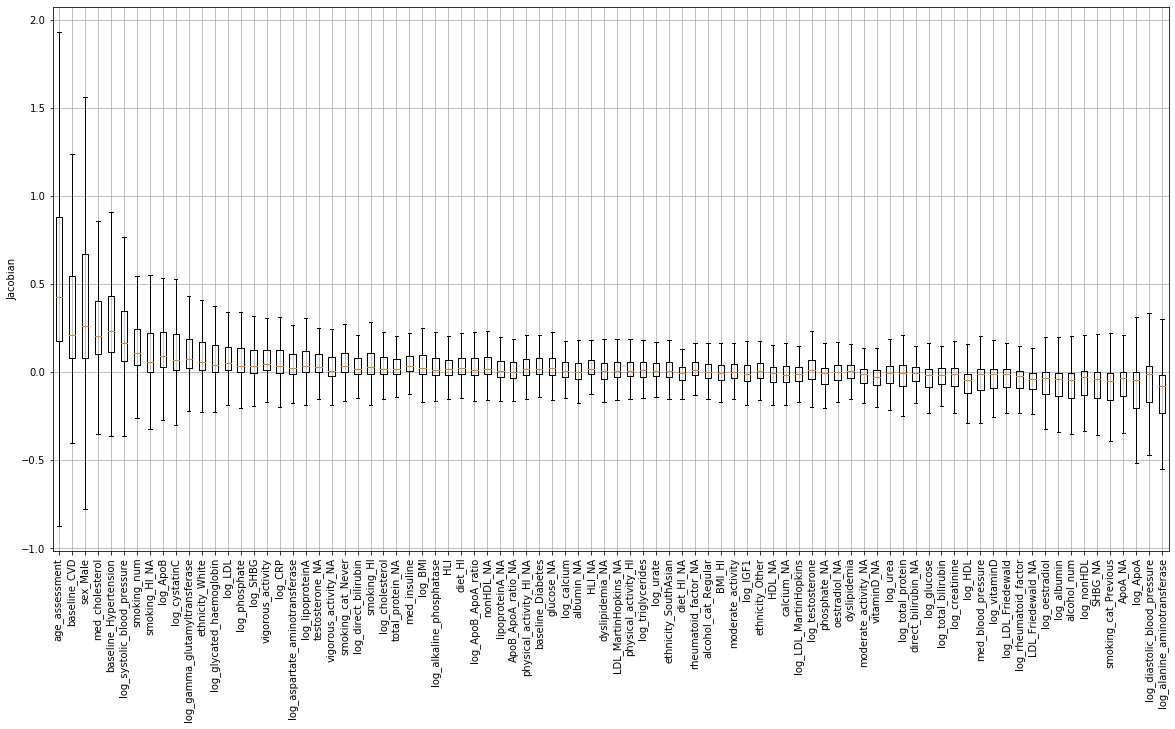

In [8]:
#plotting jacobian
xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
lst = np.argsort(-np.sum((J),axis=0))
plt.figure(figsize=[20,10])
plt.boxplot(J[:,lst], showfliers=False)
plt.grid()
plt.xticks(np.arange(len(xlb))+1,xlb[lst],rotation='vertical')
plt.ylabel('Jacobian')
plt.show()

#xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
#plt.figure(figsize=[20,10])
##plt.boxplot(J[:,lst])
#plt.boxplot(J[:,lst[0:10]])
#plt.grid()
#plt.xticks(np.arange(len(xlb[0:10]))+1,xlb[lst][0:10],rotation='vertical')
#plt.ylabel('Jacobian')
#plt.show()

# sans base

In [9]:
RS_composite_all = RiskScore.load('RS_cvd_sans_base.tar.gz')

Successfully loaded file: ./RS_cvd_sans_base.pkl
Successfully uploaded DeepSurv model from folder: ./RS_cvd_sans_base_DeepSurv_model


In [10]:
#RS_composite_all.X_train.assign(T=RS_composite_all.T_train, E=RS_composite_all.E_train)

## jacobian

In [11]:
def get_Jacobian(RS_composite_all,eps=1e-3):
    n,p = RS_composite_all.X_train.shape
    J = np.zeros([n,p])
    for i in range(p):
        #print(i)
        x0 = RS_composite_all.X_train.copy()
        x1 = RS_composite_all.X_train.copy()
        x0.iloc[:,i] = x0.iloc[:,i] - eps
        x1.iloc[:,i] = x1.iloc[:,i] + eps
        J[:,i:i+1] = ((RS_composite_all.deep_surv.predict_risk(x1) \
                      - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps))[:,0:0+1]
    return J

J = get_Jacobian(RS_composite_all)

#n,p = RS_composite_all.X_train.shape
#J = np.zeros([n,p])
#x0.iloc[:,1] - 0.001 
##for i in range(p):
##    print(i)
##    x0 = RS_composite_all.X_train.copy()
##    x1 = RS_composite_all.X_train.copy()
##    x0[:,i] = x0[:,i] - eps
##    x1[:,i] = x1[:,i] + eps
##    J[:,i:i+1] = (RS_composite_all.deep_surv.predict_risk(x1) \
##                  - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps)

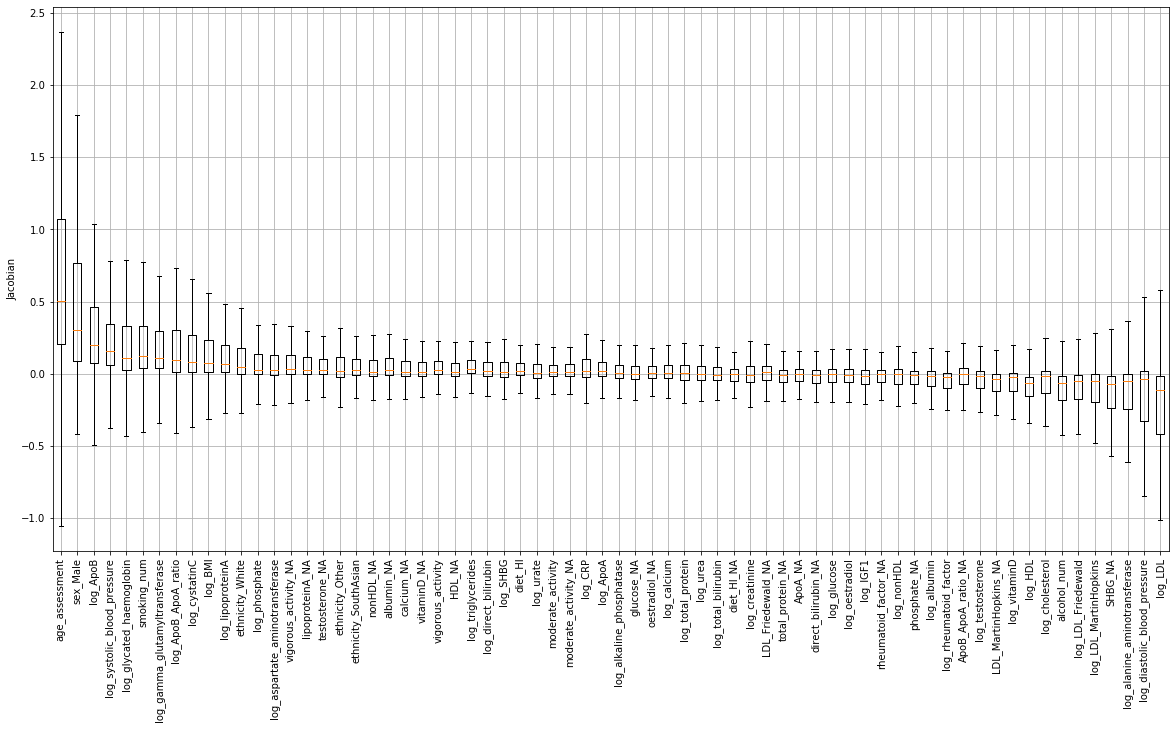

In [12]:
#plotting jacobian
xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
lst = np.argsort(-np.sum((J),axis=0))
plt.figure(figsize=[20,10])
plt.boxplot(J[:,lst], showfliers=False)
plt.grid()
plt.xticks(np.arange(len(xlb))+1,xlb[lst],rotation='vertical')
plt.ylabel('Jacobian')
plt.show()

#xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
#plt.figure(figsize=[20,10])
##plt.boxplot(J[:,lst])
#plt.boxplot(J[:,lst[0:10]])
#plt.grid()
#plt.xticks(np.arange(len(xlb[0:10]))+1,xlb[lst][0:10],rotation='vertical')
#plt.ylabel('Jacobian')
#plt.show()

# Lab only

In [13]:
RS_composite_all = RiskScore.load('RS_cvd_lab.tar.gz')

Successfully loaded file: ./RS_cvd_lab.pkl
Successfully uploaded DeepSurv model from folder: ./RS_cvd_lab_DeepSurv_model


## jacobian

In [14]:
def get_Jacobian(RS_composite_all,eps=1e-3):
    n,p = RS_composite_all.X_train.shape
    J = np.zeros([n,p])
    for i in range(p):
        #print(i)
        x0 = RS_composite_all.X_train.copy()
        x1 = RS_composite_all.X_train.copy()
        x0.iloc[:,i] = x0.iloc[:,i] - eps
        x1.iloc[:,i] = x1.iloc[:,i] + eps
        J[:,i:i+1] = ((RS_composite_all.deep_surv.predict_risk(x1) \
                      - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps))[:,0:0+1]
    return J

J = get_Jacobian(RS_composite_all)

#n,p = RS_composite_all.X_train.shape
#J = np.zeros([n,p])
#x0.iloc[:,1] - 0.001 
##for i in range(p):
##    print(i)
##    x0 = RS_composite_all.X_train.copy()
##    x1 = RS_composite_all.X_train.copy()
##    x0[:,i] = x0[:,i] - eps
##    x1[:,i] = x1[:,i] + eps
##    J[:,i:i+1] = (RS_composite_all.deep_surv.predict_risk(x1) \
##                  - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps)

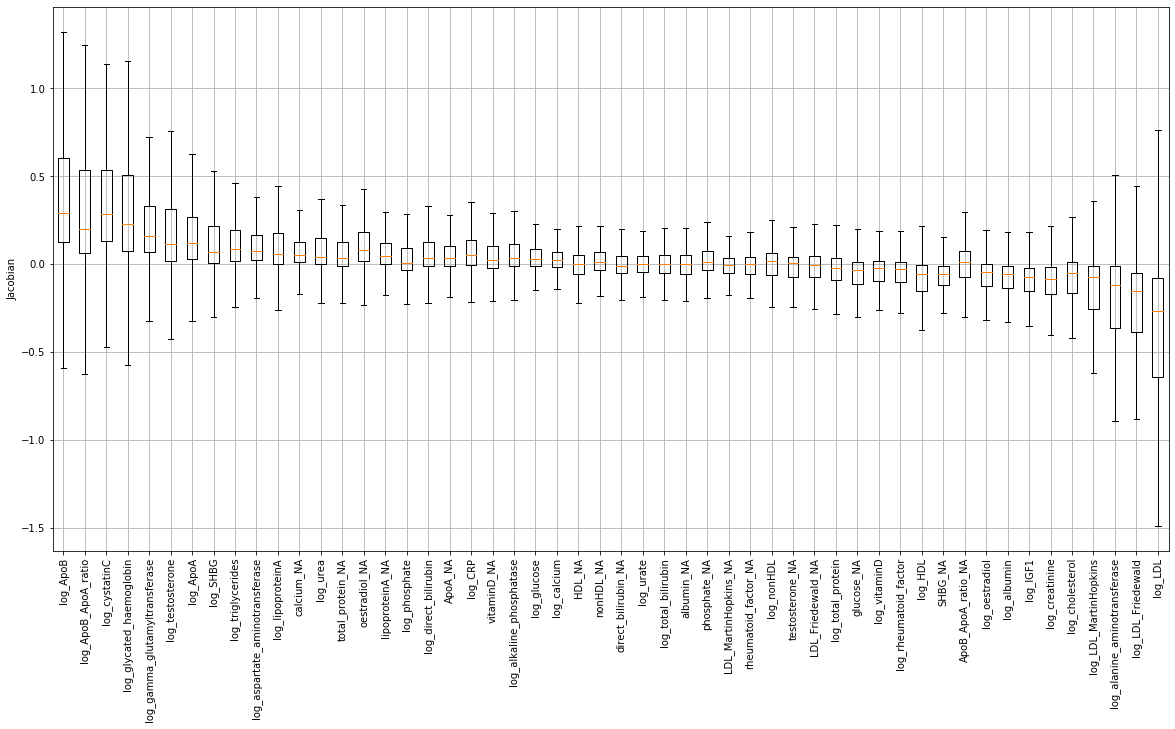

In [15]:
#plotting jacobian
xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
lst = np.argsort(-np.sum((J),axis=0))
plt.figure(figsize=[20,10])
plt.boxplot(J[:,lst], showfliers=False)
plt.grid()
plt.xticks(np.arange(len(xlb))+1,xlb[lst],rotation='vertical')
plt.ylabel('Jacobian')
plt.show()

#xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
#plt.figure(figsize=[20,10])
##plt.boxplot(J[:,lst])
#plt.boxplot(J[:,lst[0:10]])
#plt.grid()
#plt.xticks(np.arange(len(xlb[0:10]))+1,xlb[lst][0:10],rotation='vertical')
#plt.ylabel('Jacobian')
#plt.show()

# Lab + demo

In [3]:
RS_composite_all = RiskScore.load('RS_cvd_lab_demo.tar.gz')

Successfully loaded file: ./RS_cvd_lab_demo.pkl
Successfully uploaded DeepSurv model from folder: ./RS_cvd_lab_demo_DeepSurv_model


## jacobian

In [4]:
def get_Jacobian(RS_composite_all,eps=1e-3):
    n,p = RS_composite_all.X_train.shape
    J = np.zeros([n,p])
    for i in range(p):
        #print(i)
        x0 = RS_composite_all.X_train.copy()
        x1 = RS_composite_all.X_train.copy()
        x0.iloc[:,i] = x0.iloc[:,i] - eps
        x1.iloc[:,i] = x1.iloc[:,i] + eps
        J[:,i:i+1] = ((RS_composite_all.deep_surv.predict_risk(x1) \
                      - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps))[:,0:0+1]
    return J

J = get_Jacobian(RS_composite_all)

#n,p = RS_composite_all.X_train.shape
#J = np.zeros([n,p])
#x0.iloc[:,1] - 0.001 
##for i in range(p):
##    print(i)
##    x0 = RS_composite_all.X_train.copy()
##    x1 = RS_composite_all.X_train.copy()
##    x0[:,i] = x0[:,i] - eps
##    x1[:,i] = x1[:,i] + eps
##    J[:,i:i+1] = (RS_composite_all.deep_surv.predict_risk(x1) \
##                  - RS_composite_all.deep_surv.predict_risk(x0))/(2.0*eps)

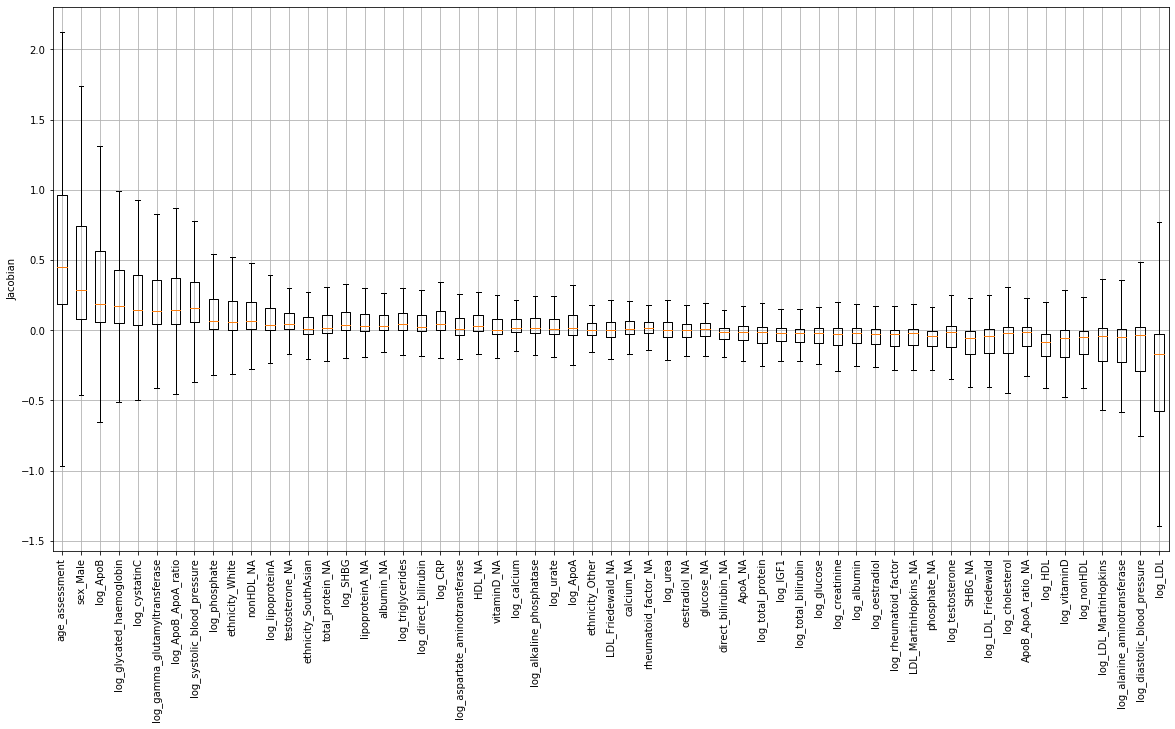

In [5]:
#plotting jacobian
xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
lst = np.argsort(-np.sum((J),axis=0))
plt.figure(figsize=[20,10])
plt.boxplot(J[:,lst], showfliers=False)
plt.grid()
plt.xticks(np.arange(len(xlb))+1,xlb[lst],rotation='vertical')
plt.ylabel('Jacobian')
plt.show()

#xlb = RS_composite_all.X_train.columns
#lst = np.argsort(-np.sum(np.abs(J),axis=0))
#plt.figure(figsize=[20,10])
##plt.boxplot(J[:,lst])
#plt.boxplot(J[:,lst[0:10]])
#plt.grid()
#plt.xticks(np.arange(len(xlb[0:10]))+1,xlb[lst][0:10],rotation='vertical')
#plt.ylabel('Jacobian')
#plt.show()